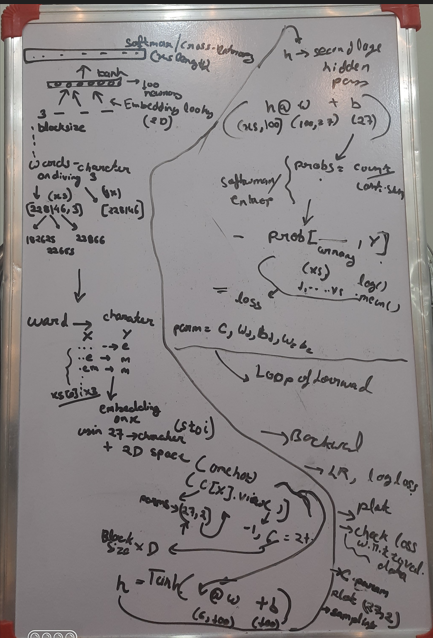

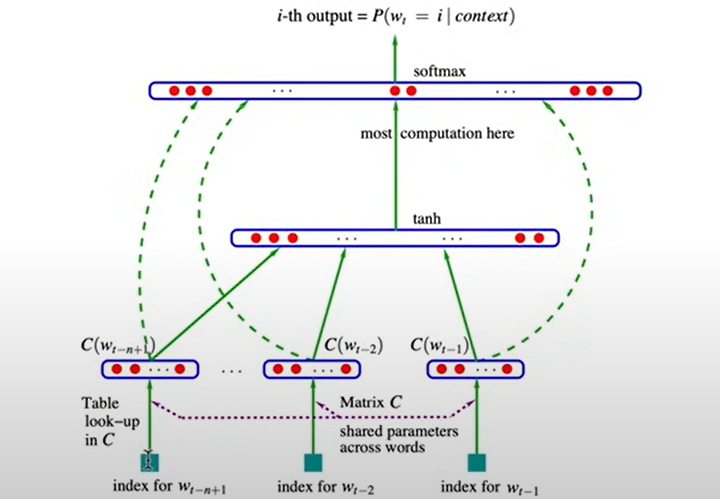

- look-up is basically convert the word to ex. 30D data
- the internal layer (mentioned tanh) size is a hypermeter so we use it as a design size
- example 100 nueral layer - connect with 3*30 layer the tanh 
- then output layer can give any one from the 17000 words so nuerons on output is 17,000
- and all are fully connnected
- expensive layer- output
- then we have softmax where: we first exponsiated all the number and then we normalized the output we get the probability distribution for next word in sequence.
- while training we have the identity/label of the next word in sequence, that word or sequence we use to pluck out the probability of that word of that word w.r.t the parameters of the nueral network.
- the primer of the weight and basis of output, hidden layer and the embedding lookup table which get optimized using backpropagation

In [56]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [57]:
# read in all the words
words = open('makemore/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [58]:
len(words)

32033

In [59]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [60]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:  #[:5]:
  
  #print(w)
  context = [0] * block_size
  # print('looping on ', w + '.')
  for ch in w + '.':
    ix = stoi[ch]
    # print('context', context)
    X.append(context)
    Y.append(ix) # Y is running context like rolling window like block_size number to predict that number of characters
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
    # print(context)
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [61]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [62]:
len(X)

228146

In [63]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [64]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [65]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


- embedding part to perform lookup
- 32,3 example 27 possible characters we have 
-  in paper thet implemented the 17000 word to 30D space 
-  defore we embed the input example using C, 
-  WE WILL EMBED signle integer
-  
- in previous we used one_hot but it will not work 
-  F.one_hot(torch.tensor(5),num_classes=27) 

In [66]:
F.one_hot(torch.tensor(5),num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [67]:
C = torch.randn((27, 2))
print(C)
print(F.one_hot(torch.tensor(5),num_classes=27).float())
# its give same C at 5th position bcoz how matrix works, we have only 1 in 5th 
F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([[-1.4477,  0.1363],
        [ 1.7038, -1.0220],
        [ 0.6115, -0.1449],
        [ 1.7311, -0.4000],
        [ 0.7431,  1.1905],
        [-0.1868,  0.0478],
        [ 1.5019,  0.3060],
        [ 1.6334, -1.1512],
        [-1.1253, -0.8222],
        [ 2.0375,  1.1314],
        [ 0.0734, -0.4592],
        [-0.1573,  1.8830],
        [-0.2778,  0.8644],
        [ 1.4065, -1.2758],
        [ 1.2065, -1.1610],
        [ 0.3066, -1.0072],
        [ 0.1429, -0.4597],
        [-0.0059,  1.6096],
        [ 2.1024,  0.6158],
        [-1.6282, -1.1769],
        [ 1.0317,  0.5302],
        [ 0.6604, -1.0975],
        [ 0.8200, -0.4209],
        [ 1.2306,  0.7886],
        [ 0.6609, -2.5127],
        [-0.0682,  0.9445],
        [ 3.5940,  1.5382]])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])


tensor([-0.1868,  0.0478])

- so we are getting single same result so we will use index

In [68]:
C = torch.randn((27, 2))

In [69]:
C.shape

torch.Size([27, 2])

In [70]:
X.shape

torch.Size([228146, 3])

In [71]:
C[X]

tensor([[[-0.2049,  0.9774],
         [-0.2049,  0.9774],
         [-0.2049,  0.9774]],

        [[-0.2049,  0.9774],
         [-0.2049,  0.9774],
         [-0.5279, -0.1967]],

        [[-0.2049,  0.9774],
         [-0.5279, -0.1967],
         [-0.0217, -0.4466]],

        ...,

        [[ 0.3158, -0.1483],
         [ 0.3158, -0.1483],
         [ 0.2417,  1.7567]],

        [[ 0.3158, -0.1483],
         [ 0.2417,  1.7567],
         [ 0.3158, -0.1483]],

        [[ 0.2417,  1.7567],
         [ 0.3158, -0.1483],
         [-2.6043,  1.5615]]])

In [72]:
emb = C[X]
emb.shape # embedding vector 2
# [all characters combination of 3 list, 3 block size things, 2 vectors from C]
# C defined to provide the dimension of characters in space 

torch.Size([228146, 3, 2])

In [19]:
X[1,2]

tensor(5)

In [20]:
C[5]

tensor([0.2584, 0.6244])

In [21]:
C[X][1,2]

tensor([0.2584, 0.6244])

- rough idea
- emb @ weights + bias
- now we need to concat using .cat() all 2 inputs to mutiply the emb with weights of shape (6 = 2D embedding * 3 input  ) * 100 nuerons

In [22]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

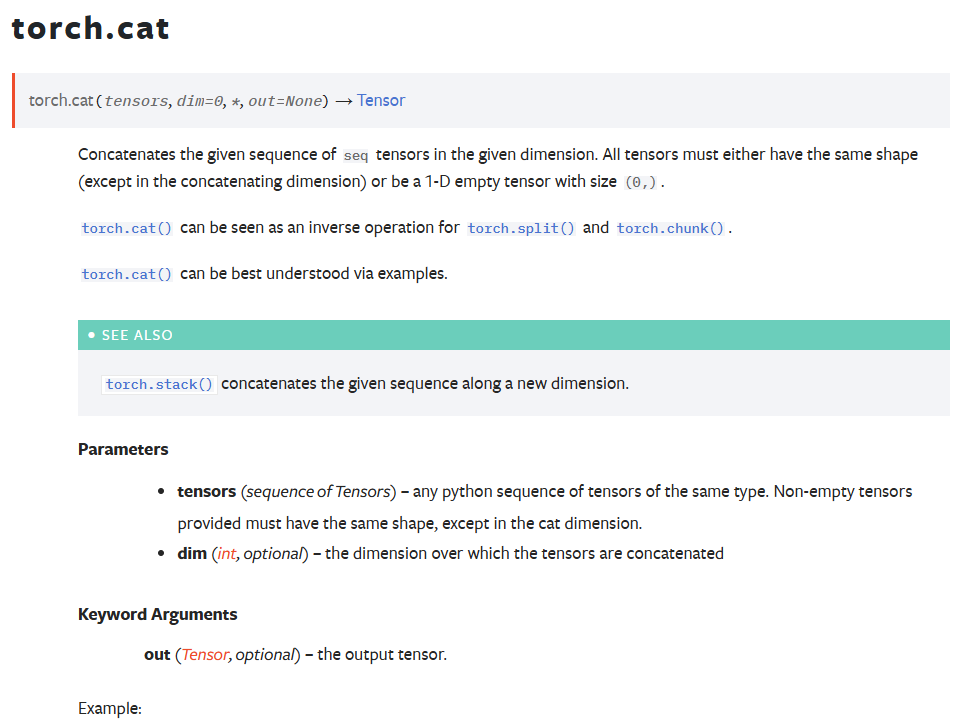

In [23]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape   

torch.Size([228146, 6])

- to generalise the block_size number chaging case
- we use torch.unbind()
- it basically remove a tensor dimension
- returns a tuple of all slices along a dimension , already without it

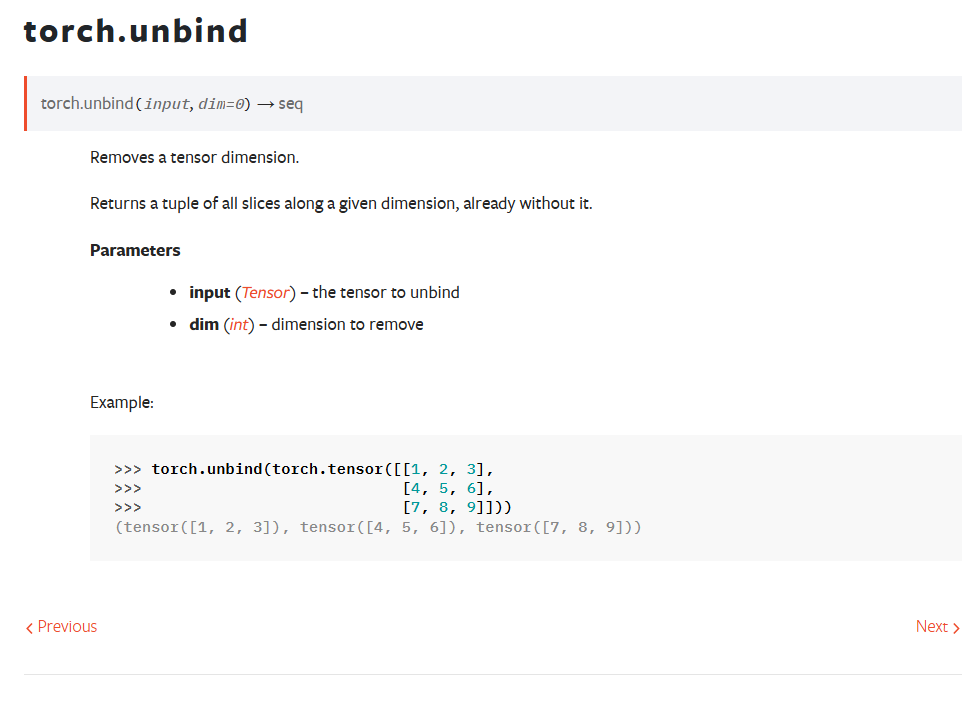

In [24]:
len(torch.unbind(emb,1))

3

In [25]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([228146, 6])

In [26]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [27]:
a.shape

torch.Size([18])

In [28]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [29]:
emb.shape

torch.Size([228146, 3, 2])

- torch.view() is usefull to see the attribute in a interpreted in n dimensional
- try a.storage()
- some attribute in particuar are storage offset, strides, , and shape are manipulated
- http://blog.ezyang.com/2019/05/pytorch-internals/
- **on PyTorch internals**: This post is a long form essay version of a talk about PyTorch internals, that I gave at the PyTorch NYC meetup on May 14, 2019.

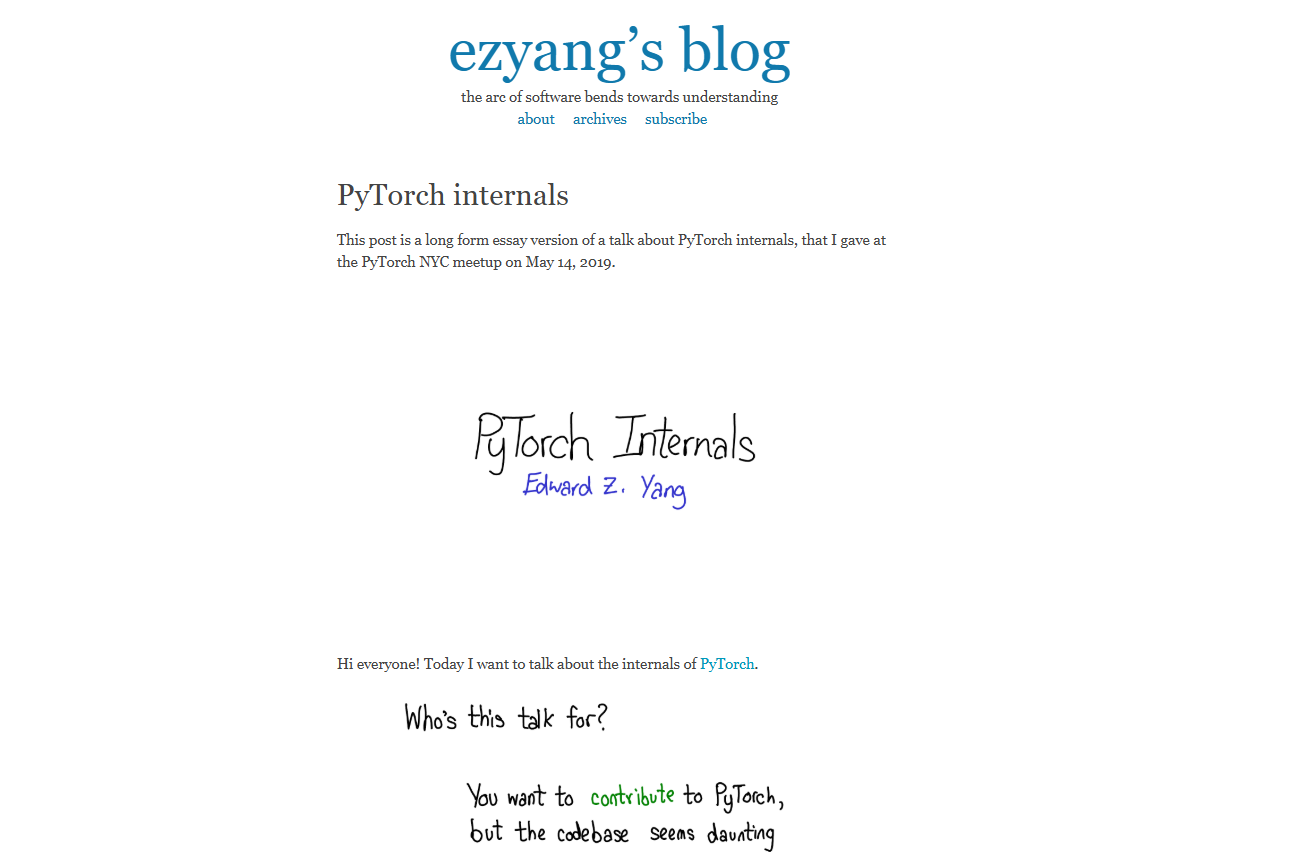

In [30]:
emb.view(emb.shape[0],6) 

tensor([[-0.6662,  0.7267, -0.6662,  0.7267, -0.6662,  0.7267],
        [-0.6662,  0.7267, -0.6662,  0.7267,  0.2584,  0.6244],
        [-0.6662,  0.7267,  0.2584,  0.6244,  0.3789, -0.6744],
        ...,
        [ 0.3741, -1.4701,  0.3741, -1.4701,  0.4998,  0.7009],
        [ 0.3741, -1.4701,  0.4998,  0.7009,  0.3741, -1.4701],
        [ 0.4998,  0.7009,  0.3741, -1.4701, -0.1275, -0.7840]])

In [31]:
emb.view(228146,6) == torch.cat(torch.unbind(emb,1),1)


tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        ...,
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

In [32]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # use emb.shape or -1 pytorch will know
# we used + we are doing([emb.shape, 100]) + ([1, 100])
# broadcasting will create a fake vector of 1 here  and copy vertically to all rows of emb.shape

In [33]:
h


tensor([[-0.9972, -0.7141, -0.9890,  ...,  0.1700, -0.9635, -0.9992],
        [-0.9631,  0.6454, -0.9963,  ..., -0.1551, -0.6910, -0.9986],
        [-0.9096,  0.6307, -0.9056,  ...,  0.9838,  0.9692, -0.9931],
        ...,
        [ 1.0000, -0.9512,  0.8101,  ..., -0.9968,  0.5033,  0.9997],
        [ 0.9896, -0.5234,  0.9180,  ...,  0.9898,  1.0000,  0.6583],
        [ 0.9923,  0.9666,  0.3037,  ...,  0.9438, -0.9555, -0.7303]])

In [34]:
h.shape

torch.Size([228146, 100])

In [35]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [36]:
logits = h @ W2 + b2 # logits are output of this architecture

In [37]:
logits.shape

torch.Size([228146, 27])

In [38]:
counts = logits.exp()

In [39]:
prob = counts / counts.sum(1, keepdims=True)

In [40]:
prob.shape

torch.Size([228146, 27])

In [41]:
prob[0].sum()

tensor(1.0000)

In [42]:
emb.shape

torch.Size([228146, 3, 2])

In [43]:
prob[torch.arange(emb.shape[0]), Y]

tensor([1.1327e-08, 8.3127e-07, 3.0157e-04,  ..., 4.0439e-09, 6.2603e-11,
        1.3983e-10])

- to store the all loss in one single number

In [44]:
loss = -prob[torch.arange(emb.shape[0]), Y].log().mean()
loss

tensor(16.0257)

- above process we can acheive by using `F.torch.cross_entropy(logits, Y)`

---

- exp() creates issue when calculating the exp of say torch.tensor = 100
- below u can seee giving `inf` value
- this solve internally use offset

In [45]:
t = torch.tensor(100)
t.exp()

tensor(inf)

In [46]:
t = torch.tensor(100) -100 #offset
t.exp()

tensor(1.)

In [47]:
# ------------ now made respectable :) ---------------

In [48]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

- if we are taking 2 means we are using 2D data only
- we can take bigger dimension might possible NN won't able to use space effectively
- its just a parameter
- it name as character embedding vectors

In [49]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)

In [50]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [51]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [52]:
for p in parameters:
  p.requires_grad = True

- to evaluate the learning rate reasonable learning rate search range.
- try different learning rates and check loss hows its decreasing
- so use linspace

In [53]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [54]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  # lr logic in begining the lr to keep higher and lower aafter a time
  # can use learning rate decay with some factor of 10
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

In [ ]:
# setting of learning rate w.r.t to loss
# to find the correct lr for model
plt.plot(lri, lossi)

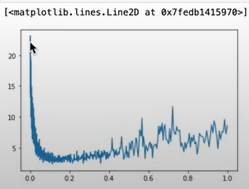

-  we need to take `loss.log10().item()` # so on taking `log() `that we can get the loss in lesser number

- we are doing the **mini-batch so the quality of the gradient is lower**
- direction of gradient is not much reliable (so its might not be the same the original direction)
- but its good enough (its much better to get the aproximate gradient that the exact to evualate to take fewer steps) that we can train the model
- so practical its good

- this` (32,) `in minibatch we can increase so that we won't get away too much from gradient and our noise is not much while training.
- so whole optimise we have is good

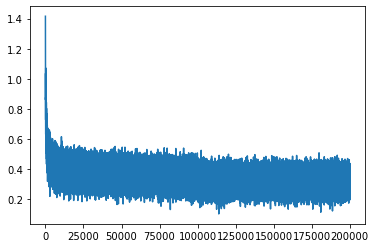

In [ ]:
plt.plot(stepi, lossi)

In [797]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1260, grad_fn=<NllLossBackward0>)

`paramaeters i.e. - C, W1, b1, W2, b2` will be same for both training and validation dataset which contaom

In [798]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1701, grad_fn=<NllLossBackward0>)

- plot of C with 27, 2 shape

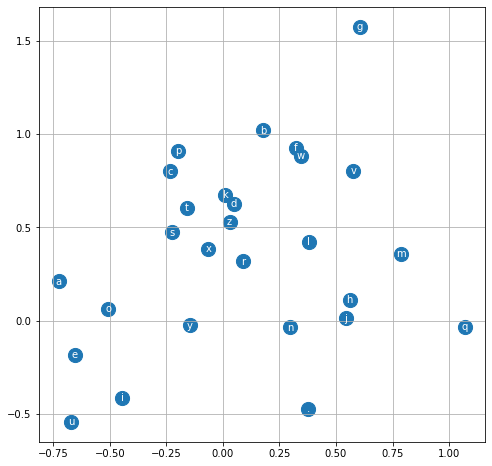

In [710]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

- vowels are very similary and there embedding are similar
- q is like excetion and embedding
- `.` is special character
- not much random but some make sense

- training split, dev/validation split, test split
- 80%, 10%, 10%
- use of training dataset is to optimize the parameters using backpropagation 
- use of dev/validation to optimize the hyperparameters
- test should be use in last when u thing train and val is having right fit no underfit, overfit and loss is somewhat same way

In [805]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [820]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmahela.
jhovi.
kimrin.
thil.
halanna.
jazhien.
amerynci.
aqui.
nellara.
chaiiv.
kaleigh.
ham.
joce.
quinton.
lilea.
jamilio.
jeron.
jaryni.
jace.
chrudeley.
